### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Fetching Data

In [2]:
df = pd.read_csv("Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [7]:
df['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [8]:
df[' Date'].value_counts()

 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name:  Date, dtype: int64

### Data Cleaning

In [9]:
df2 = df.dropna().drop(columns=[' Frequency'])

df2

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...
749,West Bengal,29-02-2020,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,15.22,9240903.0,40.67,Urban


In [10]:
df3 = df2.rename(columns={"Region" : "region", ' Date' : 'date', ' Estimated Unemployment Rate (%)' : 'est_unemp_perc', ' Estimated Employed' : 'est_mil_emp',
                          ' Estimated Labour Participation Rate (%)' : 'est_labour_perc', 'Area' : 'area'}).reset_index(drop = True)
df3['est_mil_emp'] = (df3['est_mil_emp'] / 1000000).round(2)
df3

,region,date,est_unemp_perc,est_mil_emp,est_labour_perc,area
0,Andhra Pradesh,31-05-2019,3.65,12.00,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11.76,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12.09,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12.29,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12.26,44.68,Rural
...,...,...,...,...,...,...
735,West Bengal,29-02-2020,7.55,10.87,44.09,Urban
736,West Bengal,31-03-2020,6.67,10.81,43.34,Urban
737,West Bengal,30-04-2020,15.63,9.30,41.20,Urban
738,West Bengal,31-05-2020,15.22,9.24,40.67,Urban


In [11]:
df3.duplicated().sum()

0

### Visualization and Analysis

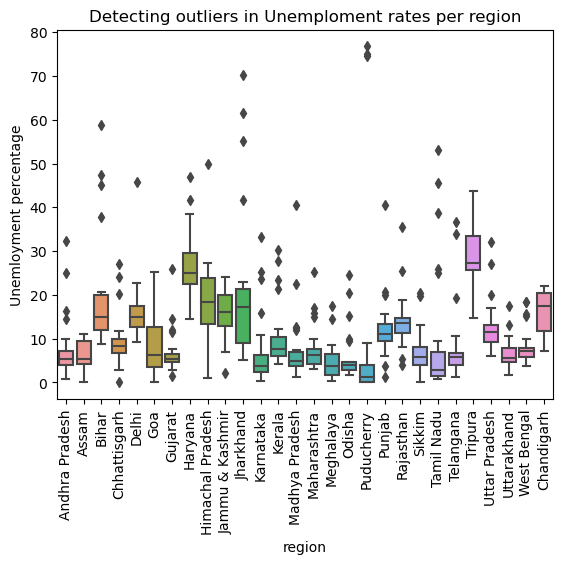

In [12]:
sns.boxplot(data= df3, x='region', y='est_unemp_perc')
plt.title('Detecting outliers in Unemploment rates per region')
plt.ylabel('Unemloyment percentage')
plt.xticks(rotation = 90)
plt.show()

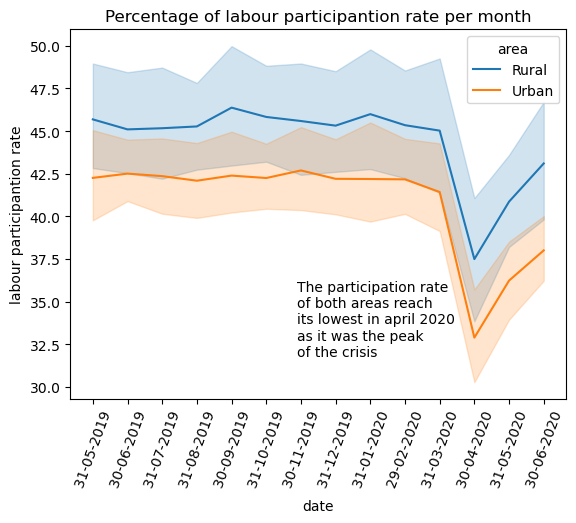

In [13]:
sns.lineplot(data=df3, x='date', y='est_labour_perc', hue='area')
plt.title('Percentage of labour participantion rate per month')
plt.ylabel('labour participantion rate')
plt.xticks(rotation= 70)
plt.figtext(x= 0.48, y= 0.2 , s= 'The participation rate\nof both areas reach\nits lowest in april 2020\nas it was the peak\nof the crisis')
plt.show()

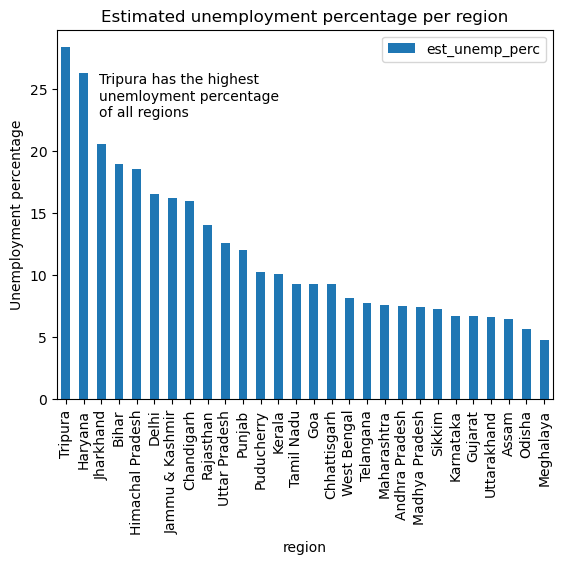

In [14]:
df5 = df3.groupby('region')[['est_unemp_perc']].mean().sort_values(by='est_unemp_perc',ascending= False)
df5.plot(kind='bar')
plt.title('Estimated unemployment percentage per region')
plt.ylabel('Unemployment percentage')
plt.xticks(rotation= 90)
plt.figtext(x= 0.19, y= 0.7, s= 'Tripura has the highest\nunemloyment percentage\nof all regions')
plt.show()

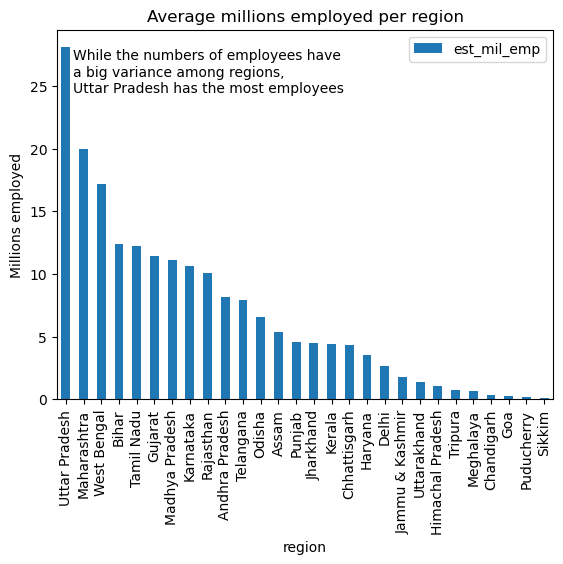

In [15]:
df4 = df3.groupby('region')[['est_mil_emp']].mean().sort_values(by='est_mil_emp',ascending= False)
df4.plot(kind='bar')
plt.title('Average millions employed per region')
plt.ylabel('Millions employed')
plt.figtext(x=0.15, y=0.75, s='While the numbers of employees have\na big variance among regions,\nUttar Pradesh has the most employees')
plt.show()

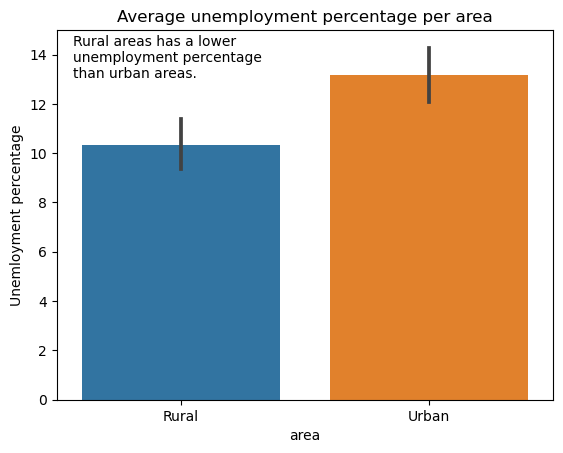

In [16]:
sns.barplot(x='area', y= 'est_unemp_perc', data= df3)
plt.figtext(x= 0.15, y= 0.78 , s= 'Rural areas has a lower\nunemployment percentage\nthan urban areas.')
plt.title("Average unemployment percentage per area")
plt.ylabel('Unemloyment percentage')
plt.show()

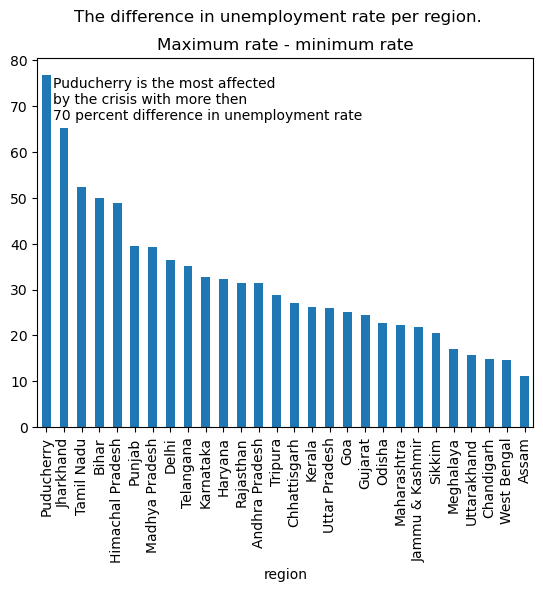

In [17]:
ax= df3.groupby('region')['est_unemp_perc'].agg(lambda x: max(x) - min(x)).sort_values(ascending=False).plot(kind='bar')
plt.suptitle('The difference in unemployment rate per region.')
plt.title('Maximum rate - minimum rate')
plt.figtext(x= 0.15, y= 0.75, s='Puducherry is the most affected\nby the crisis with more then\n70 percent difference in unemployment rate ')
plt.show()

In this task the data about unemployment rate during covid 19 in different states of India has been analyzed. In april 2020 the crisis reached its peak and caused a huge drop in the labour participation rate. The visualizations shows that the urban areas had a higher unemployment rate than rural areas. It also can be seen that states like Meghalaya has low employment rate and has low unemployment rate too, but states like Puducherry was badly affected in case of unemployment during covid 19.